Three observable trends:

1) Urban areas saw a greater amount of rides, but lower average fare values. Typically, urban areas are more populated so more people are available to use the Pyber service, and destinations are closer together, which means riders don't have as far to travel accounting for the lower fares.

2) Not surprisingly, rural areas offer the opposite to urban areas. The data shows the total number of rides to be lower in rural areas than urban and suburban areas, yet the average value for fares are greater. Rural areas are less populated so it makes sense there will be fewer people using the Pyber service, and destinations are farther away which means riders rack up more miles leading to higher fares.  

3) If you are a diver for Pyber, you have a greater opportunity to make money in rural and suburban areas. Even though urban areas account for nearly 63% of total fares, 80% of drivers are in urban areas so there is more competition for rides. in rural areas 2.6% of drivers make nearly 7% of fares, and in suburban areas 16.5% of drivers make over 30% of the fares.

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_file = "city_data.csv"
ride_data_file = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_file)
ride_data = pd.read_csv(ride_data_file)

# Combine the data into a single dataset
all_data = pd.merge(city_data, ride_data, how="left", on=["city", "city"])

# Display the data table for preview
# display(all_data)
# all_data.describe()

In [3]:
# Create new Data Frame with needed info
city_type = city_data.set_index('city')['type']
groupby_city = all_data.groupby(['city'])
average_fare = groupby_city['fare'].mean()
total_rides = groupby_city['city'].count()
driver_count = groupby_city['driver_count'].mean()

city_info_dictionary = {
    'City Type': city_type,
    'Average Fare': average_fare,
    'Total Rides': total_rides,
    'Driver Count': driver_count}

city_info_df = pd.DataFrame(data = city_info_dictionary)
# display(city_info_df)

# Create Data Frame for each city type
urban_df = city_info_df.loc[city_info_df["City Type"]== "Urban"]
suburban_df = city_info_df.loc[city_info_df["City Type"]== "Suburban"]
rural_df = city_info_df.loc[city_info_df["City Type"]== "Rural"]
# display(suburban_df)


## Bubble Plot of Ride Sharing Data

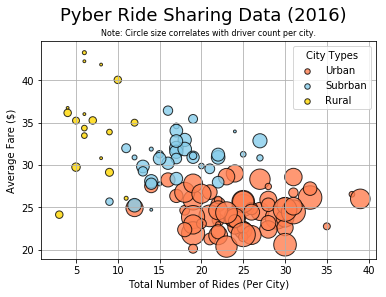

In [4]:
# Build the scatter plots for each city types
urban_plot = plt.scatter(urban_df['Total Rides'], urban_df['Average Fare'], 
                c = 'coral', edgecolors = 'black', alpha = .8, 
                s = urban_df['Driver Count'] * 8, label = 'Urban')
suburban_plot = plt.scatter(suburban_df['Total Rides'], suburban_df['Average Fare'], 
                c = 'skyblue', edgecolors = 'black', alpha = .8, 
                s = suburban_df['Driver Count'] * 8, label = 'Subrban')
rural_plot = plt.scatter(rural_df['Total Rides'], rural_df['Average Fare'], 
                c = 'gold', edgecolors = 'black', alpha = .8, 
                s = rural_df['Driver Count'] * 8, label = 'Rural')

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(axis = "both")

plt.suptitle('Pyber Ride Sharing Data (2016)',fontsize=18, y=1)

# Create a legend
legend = plt.legend(title = "City Types")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.title('Note: Circle size correlates with driver count per city.',fontsize=8)

# Save Figure
plt.savefig("Pyber-Ride-Sharing-Data-2016.png")

# Show plot
plt.show()

## Total Fares by City Type

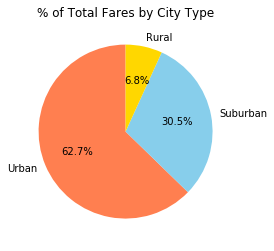

In [5]:
# Calculate Type Percents
total_fare = all_data['fare'].sum()
total_urban_rides = all_data.loc[all_data["type"]== "Urban"]
percent_urban_fare = (total_urban_rides['fare'].sum() / total_fare) * 100
total_suburban_rides = all_data.loc[all_data["type"]== "Suburban"]
percent_suburban_fare = (total_suburban_rides['fare'].sum() / total_fare) * 100
total_rural_rides = all_data.loc[all_data["type"]== "Rural"]
percent_rural_fare = (total_rural_rides['fare'].sum() / total_fare) * 100


# Build Pie Chart
section_labels = ["Urban", "Suburban", "Rural"]
sizes = [percent_urban_fare, percent_suburban_fare, percent_rural_fare]
colors = ['coral', 'skyblue', 'gold']
total_fare_by_city_type = plt.pie(sizes, labels = section_labels, 
                colors = colors, autopct = "%1.1f%%", shadow = False, startangle = 90)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Total-Fares-by-City-Type.png")

# Show Figure
plt.show()

## Total Rides by City Type

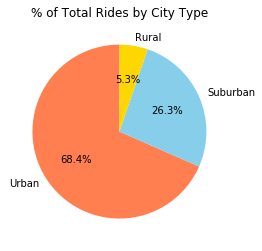

In [6]:
# Calculate Ride Percents
total_rides = all_data['ride_id'].count()
percent_total_rides_urban = (urban_df['Total Rides'].sum() / total_rides) * 100
percent_total_rides_suburban = (suburban_df['Total Rides'].sum() / total_rides) * 100
percent_total_rides_rural = (rural_df['Total Rides'].sum() / total_rides) * 100

# Build Pie Chart
city_labels = ["Urban", "Suburban", "Rural"]
percents = [percent_total_rides_urban, percent_total_rides_suburban, percent_total_rides_rural]
colors = ['coral', 'skyblue', 'gold']
total_rides_by_city_type = plt.pie(percents, labels = city_labels, 
                colors = colors, autopct = "%1.1f%%", shadow = False, startangle = 90)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Total-Rides-by-City-Type.png")

# Show Figure
plt.show()

## Total Drivers by City Type

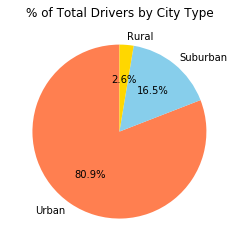

In [7]:
# Calculate Driver Percents
total_drivers = city_info_df['Driver Count'].sum()
percent_total_drivers_urban = (urban_df['Driver Count'].sum() / total_drivers) * 100
percent_total_drivers_suburban = (suburban_df['Driver Count'].sum() / total_drivers) * 100
percent_total_drivers_rural = (rural_df['Driver Count'].sum() / total_drivers) * 100

# Build Pie Charts
pie_labels = ["Urban", "Suburban", "Rural"]
values = [percent_total_drivers_urban, percent_total_drivers_suburban, percent_total_drivers_rural]
colors = ['coral', 'skyblue', 'gold']
total_drivers_by_city_type = plt.pie(values, labels = pie_labels, 
                colors = colors, autopct = "%1.1f%%", shadow = False, startangle = 90)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Total-Drivers-by-City-Type.png")

# Show Figure
plt.show()